In [1]:
from cluster_common import *

Welcome to JupyROOT 6.12/04


In [2]:
max_events = 10000
max_parts = 1000
max_layers = 28

In [3]:
fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_gamma25_newDefault_n9000.root"
hit_type = 'rechit'

In [4]:
array = get_event_array(fname, hit_type = hit_type, max_events = max_events)

## Reading data from tree
## Done reading


In [5]:
n_parts = 0
part_clust_data = []

for event in array:                                                                                                                                                                                                                                                         
    if n_parts >= max_parts: break                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
    particles = get_genparticles(event)                                                                                                                                                                                                                                             
    if len(particles) < 1: continue                                                                                                                                                                                                                                             
    n_parts += len(particles)                                                                                                                                                                                                                                               
                                                                                                                                                                                                                                                                                
    ### HITS                                                                                                                                                                                                                                                                
    hits_xyz, hits_energies = get_hits(event, hit_type = hit_type, max_layer = max_layers)
    
    hits = hits_xyz
    enes = hits_energies
    
    clusters = my_cluster(hits, enes)
    if clusters: part_clust_data.append((particles,clusters))

In [6]:
etas = []
pcavars1 = []
pcavars2 = []
pcavars3 = []
enes = []
for particles, clusters in part_clust_data:
    particle = particles[0]
    if not clusters: continue
    for cluster in clusters: 
        if cluster.energy < 10: continue 
        dR = deltaR(particle.eta,particle.phi, cluster.eta,cluster.phi) 
        if dR < 0.1 and cluster.pca.explained_variance_ratio_[0] > 0.7:  
            #etas.append(cluster.eta)
            etas.append(particle.eta)
            enes.append(cluster.energy)
            pcavars1.append(cluster.pca.explained_variance_ratio_[0])
            pcavars2.append(cluster.pca.explained_variance_ratio_[1])
            pcavars3.append(cluster.pca.explained_variance_ratio_[2])

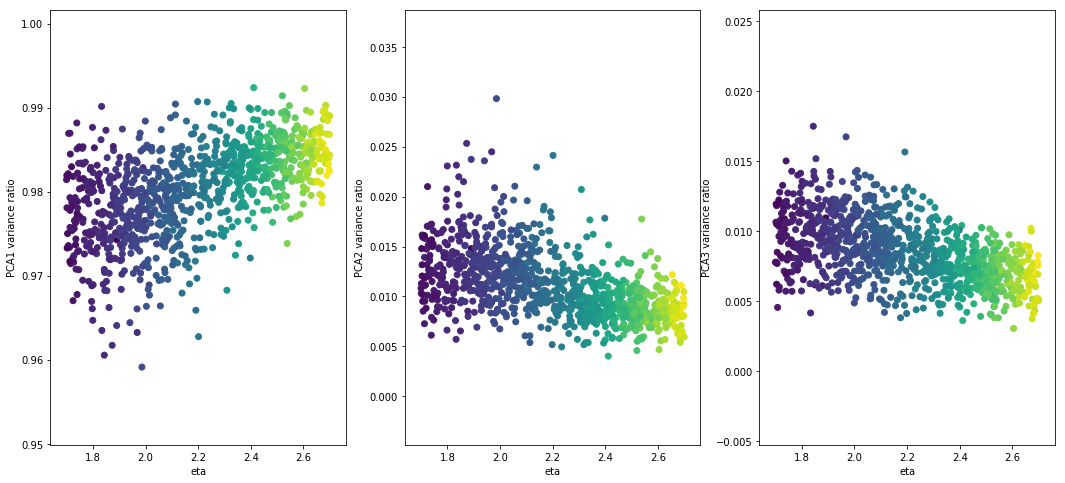

In [7]:
#ax = plt.subplot()
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.scatter(etas,pcavars1,c = enes)
plt.xlabel('eta')
plt.ylabel('PCA1 variance ratio')
plt.subplot(132)
plt.scatter(etas,pcavars2,c = enes)
plt.xlabel('eta')
plt.ylabel('PCA2 variance ratio')
plt.subplot(133)
plt.scatter(etas,pcavars3,c = enes)
plt.xlabel('eta')
plt.ylabel('PCA3 variance ratio')

plt.show()

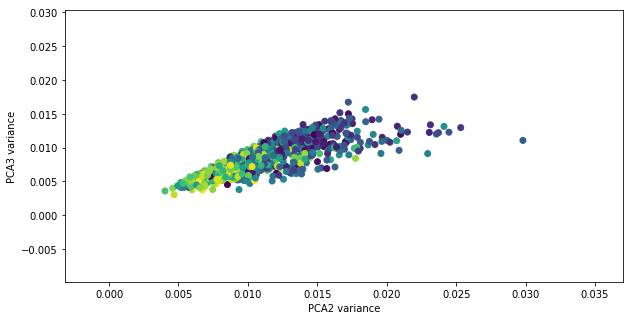

In [8]:
#ax = plt.subplot()
plt.figure(figsize=(10,5))
plt.scatter(pcavars2,pcavars3,c = etas)#,s = enes)
plt.xlabel('PCA2 variance')
plt.ylabel('PCA3 variance')

plt.show()

################################################################################
Analyzing data
[  1.05524967e+02   9.62380392e-01   2.27016566e-02]
Plotting


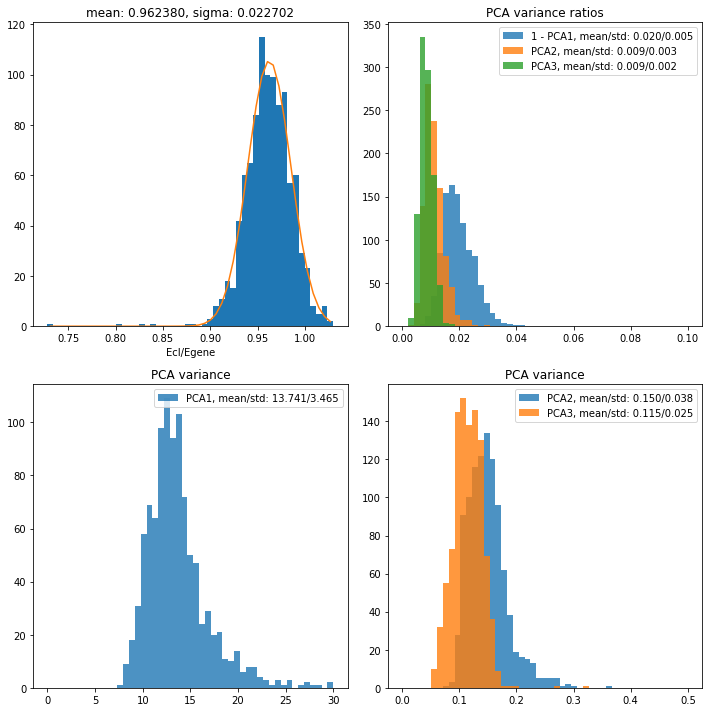

In [9]:
analyzer(part_clust_data, figtitle = 'Rechit', show_plot=False) 


## Reading data from tree
## Done reading
################################################################################
Analyzing data
[  1.44899105e+02   9.65119407e-01   2.43526613e-02]
Plotting


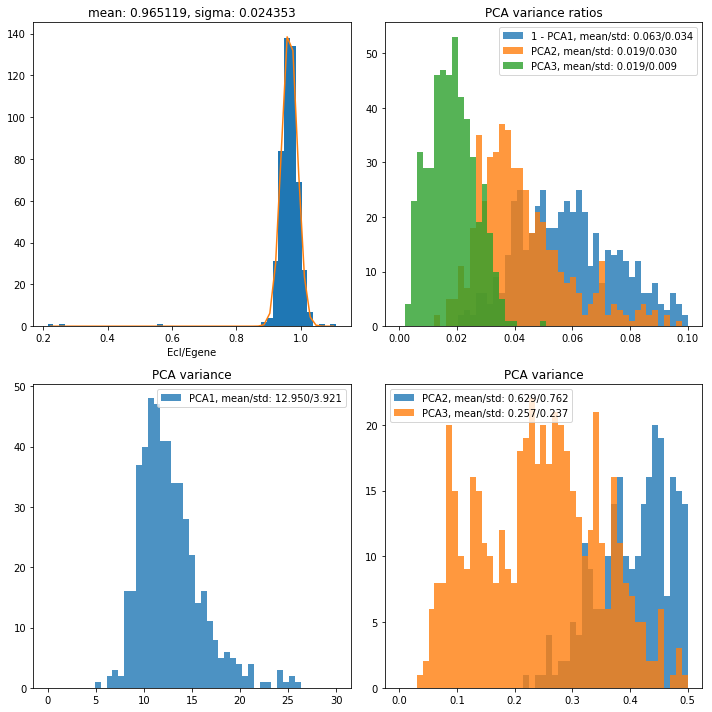

In [10]:
fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/ntuple_test_alllayers_1.root"
hit_type = 'tc'
events = get_event_array(fname, hit_type = hit_type, max_events = max_events)
n_parts = 0
part_clust_data = []

for event in events:                                                                                                                                                                                                                                                         
    if n_parts >= max_parts: break                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
    particles = get_genparticles(event)                                                                                                                                                                                                                                             
    if len(particles) < 1: continue                                                                                                                                                                                                                                             
    n_parts += len(particles)                                                                                                                                                                                                                                               
                                                                                                                                                                                                                                                                                
    ### HITS                                                                                                                                                                                                                                                                
    hits_xyz, hits_energies = get_hits(event, hit_type = hit_type, max_layer = max_layers)
    
    hits = hits_xyz
    enes = hits_energies
    
    clusters = my_cluster(hits, enes)
    if clusters: part_clust_data.append((particles,clusters))
analyzer(part_clust_data, figtitle = 'Rechit', show_plot=False) 

In [11]:
for (particles,clusters) in part_clust_data[:4]:
    print len([1 for cluster in clusters if cluster.energy > 40])

1
1
1
1


In [12]:
etas = []
pcavars1 = []
pcavars2 = []
pcavars3 = []
enes = []
for particles, clusters in part_clust_data:
    particle = particles[0]
    if not clusters: continue
    for cluster in clusters: 
        if cluster.energy < 10: continue 
        dR = deltaR(particle.eta,particle.phi, cluster.eta,cluster.phi) 
        if dR < 0.1 and cluster.pca.explained_variance_ratio_[0] > 0.7:  
            etas.append(cluster.eta)
            enes.append(cluster.energy)
            pcavars1.append(cluster.pca.explained_variance_ratio_[0])
            pcavars2.append(cluster.pca.explained_variance_ratio_[1])
            pcavars3.append(cluster.pca.explained_variance_ratio_[2])

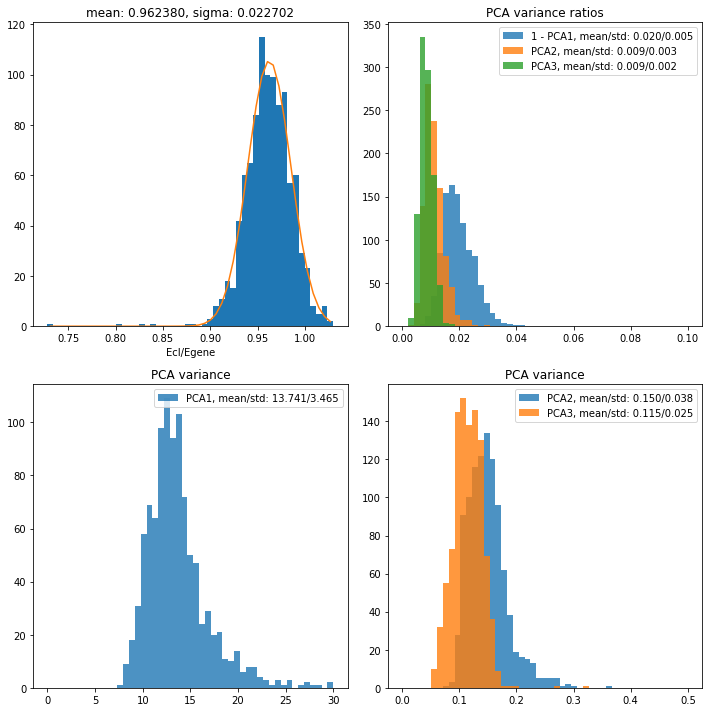

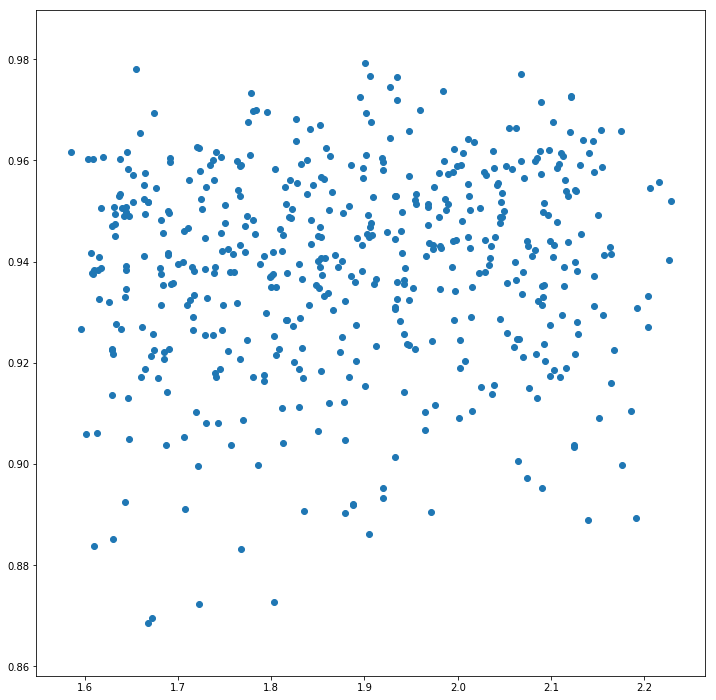

In [13]:
ax = plt.subplot()
ax.scatter(etas,pcavars1)#,s = enes)
plt.show()

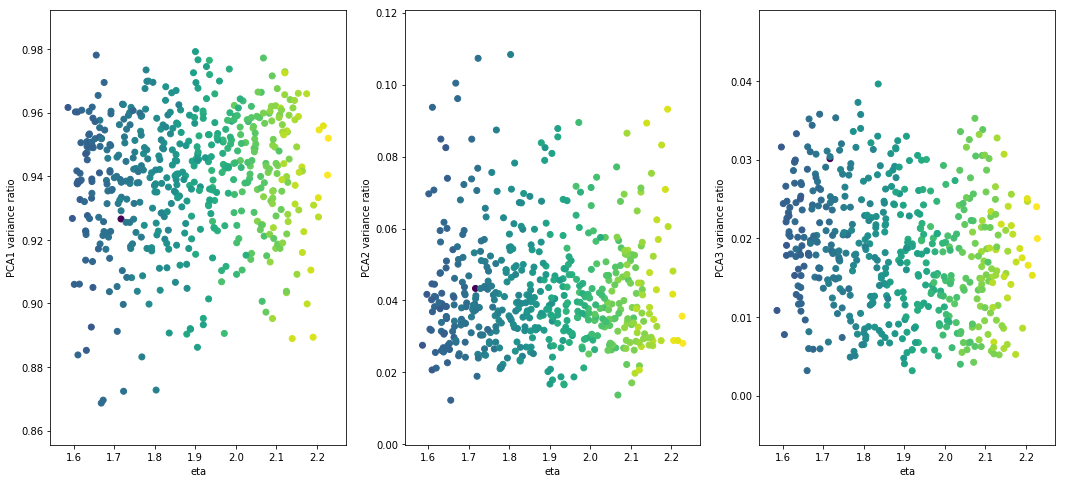

In [14]:
#ax = plt.subplot()
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.scatter(etas,pcavars1,c = enes)
plt.xlabel('eta')
plt.ylabel('PCA1 variance ratio')
plt.subplot(132)
plt.scatter(etas,pcavars2,c = enes)
plt.xlabel('eta')
plt.ylabel('PCA2 variance ratio')
plt.subplot(133)
plt.scatter(etas,pcavars3,c = enes)
plt.xlabel('eta')
plt.ylabel('PCA3 variance ratio')

plt.show()